In [1]:
import pandas as pd
import numpy as np
from Functional_Fusion.dataset import *
from scipy.linalg import block_diag
import torch as pt
import matplotlib.pyplot as plt
from ProbabilisticParcellation.util import *
import PcmPy as pcm
import torch as pt
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from copy import deepcopy
import ProbabilisticParcellation.learn_fusion_gpu as lf
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as sc
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.parcel_hierarchy as ph
import Functional_Fusion.dataset as ds
import HierarchBayesParcel.evaluation as ev
import logging


In [9]:
mname = 'Models_03/sym_MdPoNiIbWmDeSo_space-MNISymC2_K-32_meth-mixed'
# f_assignment = 'mixed_assignment_68_16.csv'
# df_assignment = pd.read_csv(
    # model_dir + '/Atlases/' + '/' + f_assignment)


In [8]:
print(model_dir + '/Atlases/' + '/')


/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases//


In [10]:
# mapping, labels = ph.mixed_clustering(mname, df_assignment)
labels, w_cos_sim, spatial_sim, ind = ph.similarity_matrices(mname)


[Text(0, 0, 'A1'),
 Text(0, 1, 'A2'),
 Text(0, 2, 'A3'),
 Text(0, 3, 'A4'),
 Text(0, 4, 'D1'),
 Text(0, 5, 'D2'),
 Text(0, 6, 'D3'),
 Text(0, 7, 'D4'),
 Text(0, 8, 'E1'),
 Text(0, 9, 'M1'),
 Text(0, 10, 'M2'),
 Text(0, 11, 'M3'),
 Text(0, 12, 'M4'),
 Text(0, 13, 'S1'),
 Text(0, 14, 'S2'),
 Text(0, 15, 'S3')]

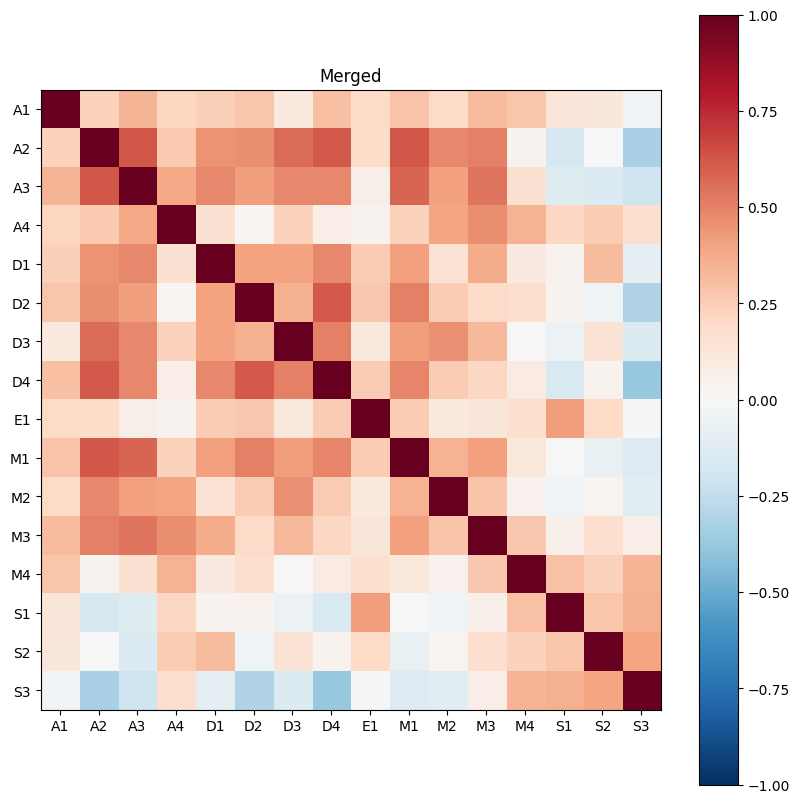

In [36]:
figsize=[10,10]
# Integrated functional similarity
plt.figure(figsize=figsize)
plt.imshow(w_cos_sim, vmin=-1, vmax=1, cmap = 'RdBu_r')
plt.title(f"Merged")
plt.colorbar()
ax = plt.gca()

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)


[Text(0, 0, 'A1'),
 Text(0, 1, 'A2'),
 Text(0, 2, 'A3'),
 Text(0, 3, 'A4'),
 Text(0, 4, 'D1'),
 Text(0, 5, 'D2'),
 Text(0, 6, 'D3'),
 Text(0, 7, 'D4'),
 Text(0, 8, 'E1'),
 Text(0, 9, 'M1'),
 Text(0, 10, 'M2'),
 Text(0, 11, 'M3'),
 Text(0, 12, 'M4'),
 Text(0, 13, 'S1'),
 Text(0, 14, 'S2'),
 Text(0, 15, 'S3')]

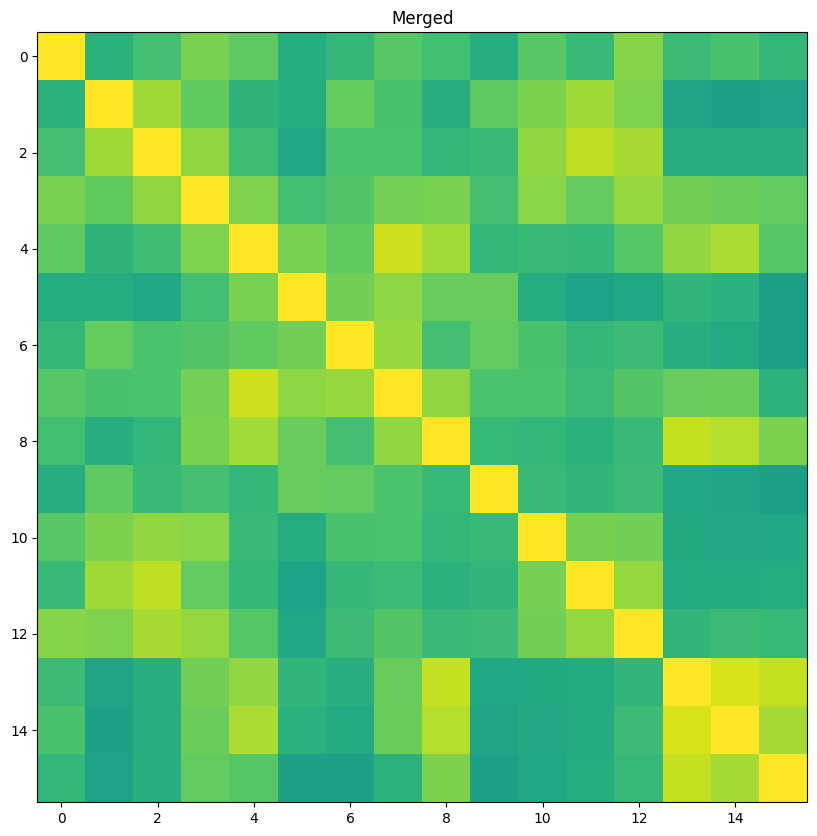

In [27]:

# Spatial similarity

plt.figure(figsize=figsize)
plt.imshow(spatial_sim, vmin=-1, vmax=1)
plt.title(f"Merged")


ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
